In [1]:
import pandas as pd

#import data (test and training data)
file="steel.csv"
independent_cols=["normalising_temperature","tempering_temperature","percent_silicon","percent_chromium",
                  "percent_copper","percent_nickel","percent_sulphur","percent_carbon","percent_manganese"]
#dependent column is the coulm we are trying to determine using the vvalues from the independent columns
dependent_col="tensile_strength"

#load in data using pandas library
df=pd.read_csv(file)

#print general information about the data 
print(df.head())    #first 4 rows
print(df.shape)     #dimension

   normalising_temperature  tempering_temperature  percent_silicon  \
0                  178.500                    275           0.1530   
1                  178.500                    950           0.1530   
2                  178.500                    375           0.1530   
3                  178.500                    900           0.1530   
4                  189.525                    900           0.1624   

   percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
0          0.970575           0.942          0.8870              0.0   
1          1.212726           0.942          0.8870              0.0   
2          1.621165           0.942          0.8870              0.0   
3          0.809989           0.942          0.8870              0.0   
4          1.036229           0.849          0.9382              0.0   

   percent_carbon  percent_manganese  tensile_strength  
0           1.920                0.0         25.107613  
1           1.920               

In [2]:
#set up matrix containing independent variables 
X=df.loc[:,independent_cols].values

In [3]:
#set up vector y containing dependent variable
y=df.loc[:,dependent_col].values

In [14]:
#function for cross validation (more efficient that running it over and over)
from sklearn.model_selection import cross_validate
def cv(model_val,x_val,y_val,cv_val, scoring_val):
    r=cross_validate(estimator=model_val, X=x_val, y=y_val,cv=cv_val,scoring=scoring_val,return_train_score=True)
    #print("r: ",r)
    #print("average score for training data using r^2",r['train_r2'].mean())
    #print("\n")
    #print("average score for test data using r^2",r['test_r2'].mean())
    return{ #returns averge for all 10 folds
        "r2 mean test": r['test_r2'].mean(),
        "r2 mean train": r['train_r2'].mean(),
        "test_neg_root_mean_squared_error": r['test_neg_root_mean_squared_error'].mean(),
        "train_neg_root_mean_squared_error": r['train_neg_root_mean_squared_error'].mean()
    }

In [21]:
#Have to split the data ourself as it isnt split - use 10 fold cross validation
#first using k nearest neighbour regression classifier with default hyperparams
import numpy as np 
from sklearn.neighbors import KNeighborsRegressor

#want 10 folds so set cv to 10 and repeat it 10 times, so put in loop with values 1-10
rounds=[1,2,3,4,5,6,7,8,9,10]

knn_result=[]
av_r2_test=[]
av_r2_train=[]
av_rmsq_test=[]
av_rmsq_train=[]

#dont need to do this ten times but its easier as I can reuse my cross validation function
for roundVal in rounds:
    knn_model= KNeighborsRegressor()
    #call function for cross validation
    knn_result.append(cv(knn_model, X, y, 10, ["r2", "neg_root_mean_squared_error"]))
    
    #add average scores to a list and find max and min of list
    av_r2_test.append(knn_result[-1]['r2 mean test'])
    av_r2_train.append(knn_result[-1]['r2 mean train'])
    av_rmsq_test.append(knn_result[-1]['test_neg_root_mean_squared_error'])
    av_rmsq_train.append(knn_result[-1]['train_neg_root_mean_squared_error'])

# print(len(decision_tree_result))
# print(len(av_rmsq_train))
print("worst test using r2 scoring: ",min(av_r2_test))
print("best test using r2 scoring: ",max(av_r2_test))
print("worst test using root mean squared scoring: ",min(av_rmsq_test))
print("best test using root mean squared scoring: ",max(av_rmsq_test))
print("\n")
print("worst training using r2 scoring: ",min(av_r2_train))
print("best training using r2 scoring: ",max(av_r2_train))
print("worst training using root mean squared scoring: ",min(av_rmsq_train))
print("best training using root mean squared scoring: ",max(av_rmsq_train))

worst test using r2 scoring:  0.3425647074648562
best test using r2 scoring:  0.3425647074648562
worst test using root mean squared scoring:  -63.17589888877594
best test using root mean squared scoring:  -63.17589888877594


worst training using r2 scoring:  0.7737321604671138
best training using r2 scoring:  0.7737321604671138
worst training using root mean squared scoring:  -43.20403298010296
best training using root mean squared scoring:  -43.20403298010296


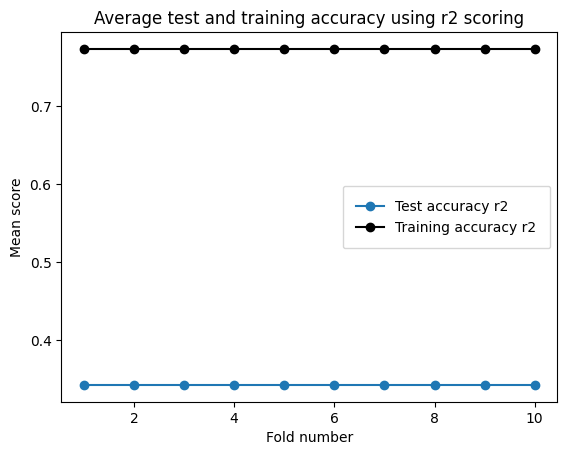

In [22]:
#Graph average training and test results for all folds for each model
import matplotlib.pyplot as plt
fold_val=[1,2,3,4,5,6,7,8,9,10]

plt.plot(fold_val , av_r2_test, '-o')
plt.plot(fold_val , av_r2_train, '-ok')
plt.xlabel("Fold number")
plt.ylabel("Mean score")
legends_labels = ["Test accuracy r2", "Training accuracy r2"]
plt.legend(labels=legends_labels, loc=7, borderpad=1)
plt.title("Average test and training accuracy using r2 scoring")
plt.show()

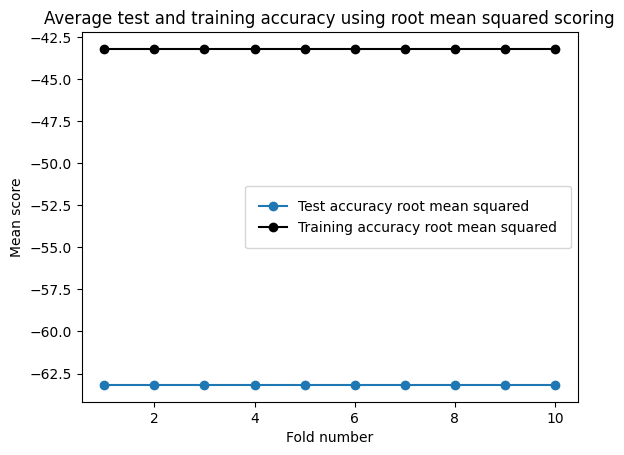

In [23]:
#plot for test and training average using root mean squared scoring
    
plt.plot(fold_val , av_rmsq_test, '-o')
plt.plot(fold_val , av_rmsq_train, '-ok')
plt.xlabel("Fold number")
plt.ylabel("Mean score")
legends_labels = ["Test accuracy root mean squared", "Training accuracy root mean squared"]
plt.legend(labels=legends_labels, loc=7, borderpad=1)
plt.title("Average test and training accuracy using root mean squared scoring")
plt.show()

In [25]:
#Find results after tuning 2 hyperparameter values for each model 

#changind max_dept hyperparameter

neighbour_val=list(range(1,20,2))

knn_result_n=[]
av_r2_test_n=[]
av_r2_train_n=[]
av_rmsq_test_n=[]
av_rmsq_train_n=[]

#using r2 scoring - domain independent
#uing neg_mean_squared_error - domain dependent

for n in neighbour_val:
    #create model
    knn_model_n=KNeighborsRegressor(n_neighbors=n)
    #performs ten fold cross validation on model with new hyperparameter value and we get the mean of all the ten folds as the result
    knn_result_n.append(cv(knn_model_n, X, y, 10, ["r2", "neg_root_mean_squared_error"]))        
    
    #add average scores to a list and find max and min of list
    av_r2_test_n.append(knn_result_n[-1]['r2 mean test'])
    av_r2_train_n.append(knn_result_n[-1]['r2 mean train'])
    av_rmsq_test_n.append(knn_result_n[-1]['test_neg_root_mean_squared_error'])
    av_rmsq_train_n.append(knn_result_n[-1]['train_neg_root_mean_squared_error'])
    
#print(decision_tree_result_depth)    
#print(len(depth_val)) #pretty sure this should be 10
print("worst test using r2 scoring: ",min(av_r2_test_n))
print("best test using r2 scoring: ",max(av_r2_test_n))
print("worst test using root mean squared scoring: ",min(av_rmsq_test_n))
print("best test using root mean squared scoring: ",max(av_rmsq_test_n))
print("\n")
print("worst training using r2 scoring: ",min(av_r2_train_n))
print("best training using r2 scoring: ",max(av_r2_train_n))
print("worst training using root mean squared scoring: ",min(av_rmsq_train_n))
print("best training using root mean squared scoring: ",max(av_rmsq_train_n))

worst test using r2 scoring:  0.11245786587880016
best test using r2 scoring:  0.3758389917290345
worst test using root mean squared scoring:  -72.11398487234366
best test using root mean squared scoring:  -62.20554343690742


worst training using r2 scoring:  0.6572035884895502
best training using r2 scoring:  1.0
worst training using root mean squared scoring:  -53.189616214704834
best training using root mean squared scoring:  0.0


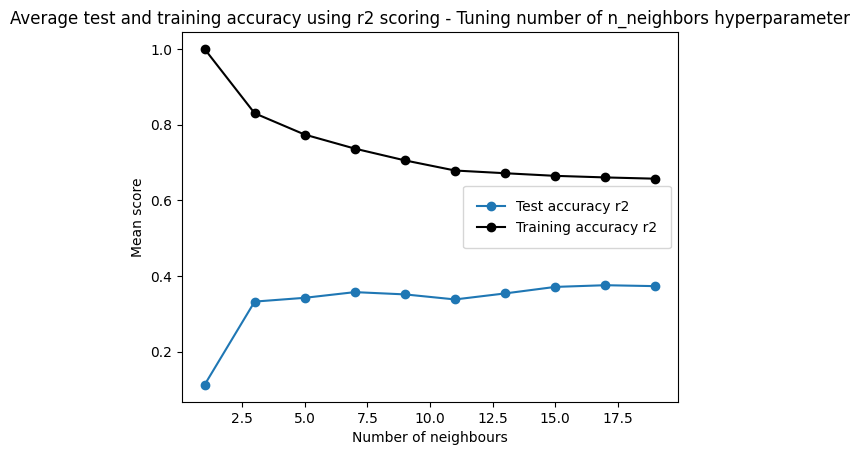

In [29]:
#plot number of neighbours values using r2 scoring

plt.plot(neighbour_val , av_r2_test_n, '-o')
plt.plot(neighbour_val , av_r2_train_n, '-ok')
plt.xlabel("Number of neighbours")
plt.ylabel("Mean score")
legends_labels = ["Test accuracy r2", "Training accuracy r2"]
plt.legend(labels=legends_labels, loc=7, borderpad=1)
plt.title("Average test and training accuracy using r2 scoring - Tuning number of n_neighbors hyperparameter")
plt.show()

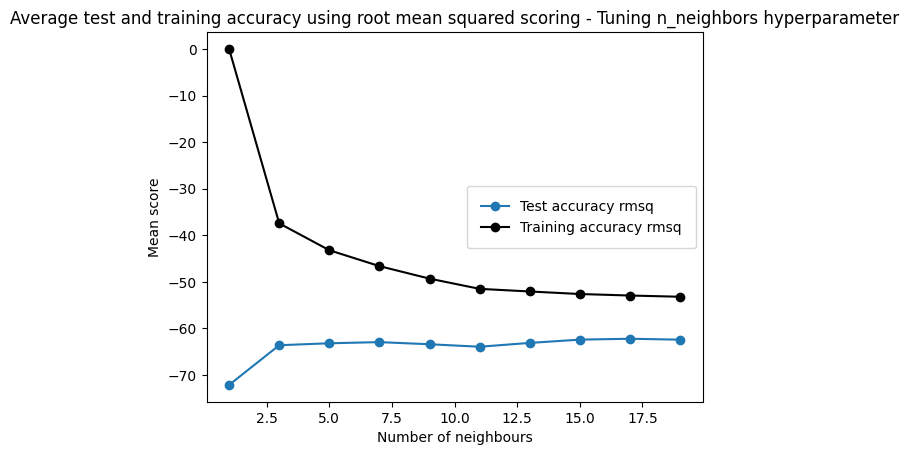

In [31]:
#plot number of neighbour values using root mean squared scoring

plt.plot(neighbour_val , av_rmsq_test_n, '-o')
plt.plot(neighbour_val , av_rmsq_train_n, '-ok')
plt.xlabel("Number of neighbours")
plt.ylabel("Mean score")
legends_labels = ["Test accuracy rmsq", "Training accuracy rmsq"]
plt.legend(labels=legends_labels, loc=7, borderpad=1)
plt.title("Average test and training accuracy using root mean squared scoring - Tuning n_neighbors hyperparameter")
plt.show()

In [46]:
#Tuning second hyperparameter
#Find results after tuning 2 hyperparameter values for each model 

#changind max_dept hyperparameter

jobs_val=list(range(1,10,1))

knn_result_jobs=[]
av_r2_test_jobs=[]
av_r2_train_jobs=[]
av_rmsq_test_jobs=[]
av_rmsq_train_jobs=[]

#using r2 scoring - domain independent
#uing neg_mean_squared_error - domain dependent

for j in jobs_val:
    #create model
    knn_model_jobs=KNeighborsRegressor(n_jobs=j)
    #performs ten fold cross validation on model with new hyperparameter value and we get the mean of all the ten folds as the result
    knn_result_jobs.append(cv(knn_model_jobs, X, y, 10, ["r2", "neg_root_mean_squared_error"]))        
    
    #add average scores to a list and find max and min of list
    av_r2_test_jobs.append(knn_result_jobs[-1]['r2 mean test'])
    av_r2_train_jobs.append(knn_result_jobs[-1]['r2 mean train'])
    av_rmsq_test_jobs.append(knn_result_jobs[-1]['test_neg_root_mean_squared_error'])
    av_rmsq_train_jobs.append(knn_result_jobs[-1]['train_neg_root_mean_squared_error'])
    
#print(decision_tree_result_depth)    
#print(len(depth_val)) #pretty sure this should be 10
print("worst test using r2 scoring: ",min(av_r2_test_jobs))
print("best test using r2 scoring: ",max(av_r2_test_jobs))
print("worst test using root mean squared scoring: ",min(av_rmsq_test_jobs))
print("best test using root mean squared scoring: ",max(av_rmsq_test_jobs))
print("\n")
print("worst training using r2 scoring: ",min(av_r2_train_jobs))
print("best training using r2 scoring: ",max(av_r2_train_jobs))
print("worst training using root mean squared scoring: ",min(av_rmsq_train_jobs))
print("best training using root mean squared scoring: ",max(av_rmsq_train_jobs))

worst test using r2 scoring:  0.3425647074648562
best test using r2 scoring:  0.3425647074648562
worst test using root mean squared scoring:  -63.17589888877594
best test using root mean squared scoring:  -63.17589888877594


worst training using r2 scoring:  0.7737321604671138
best training using r2 scoring:  0.7737321604671138
worst training using root mean squared scoring:  -43.20403298010296
best training using root mean squared scoring:  -43.20403298010296


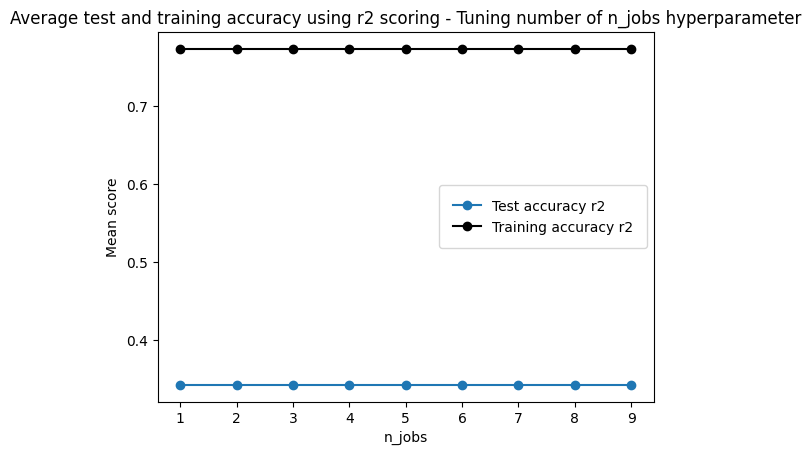

In [39]:
#plot number of jobs values using r2 scoring

plt.plot(jobs_val , av_r2_test_jobs, '-o')
plt.plot(jobs_val , av_r2_train_jobs, '-ok')
plt.xlabel("n_jobs")
plt.ylabel("Mean score")
legends_labels = ["Test accuracy r2", "Training accuracy r2"]
plt.legend(labels=legends_labels, loc=7, borderpad=1)
plt.title("Average test and training accuracy using r2 scoring - Tuning number of n_jobs hyperparameter")
plt.show()

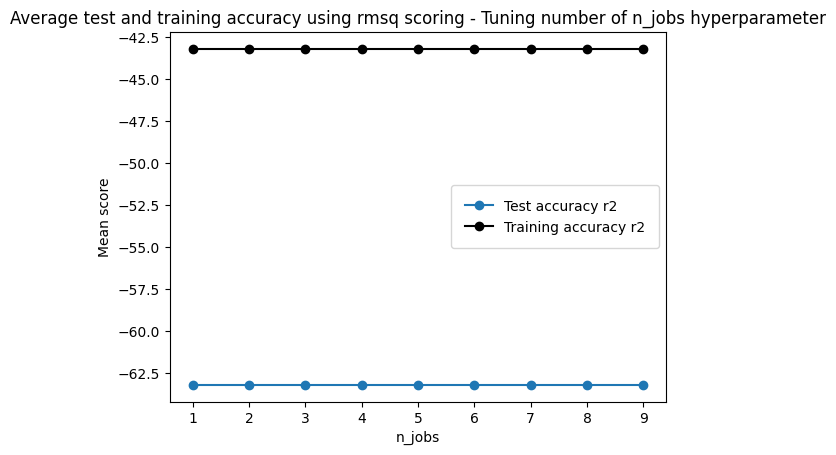

In [41]:
#plot number of jobs values using msq scoring

plt.plot(jobs_val , av_rmsq_test_jobs, '-o')
plt.plot(jobs_val , av_rmsq_train_jobs, '-ok')
plt.xlabel("n_jobs")
plt.ylabel("Mean score")
legends_labels = ["Test accuracy r2", "Training accuracy r2"]
plt.legend(labels=legends_labels, loc=7, borderpad=1)
plt.title("Average test and training accuracy using rmsq scoring - Tuning number of n_jobs hyperparameter")
plt.show()

In [42]:
#print out value where hyperparameters are best using r2 scoring (using GridSearchCV class)
from sklearn.model_selection import GridSearchCV
gsr2 = GridSearchCV(
    knn_model,
    param_grid={"n_neighbors": range(1,20,2), "n_jobs": range(1,10,1)},
    scoring="r2"
)
gsr2.fit(X, y)

print (gsr2.best_params_)

{'n_jobs': 1, 'n_neighbors': 3}


In [ ]:
#print out value where hyperparameters are best using root mean squared scoring (using GridSearchCV class)
from sklearn.model_selection import GridSearchCV
gsr2 = GridSearchCV(
    knn_model,
    param_grid={"n_neighbors": range(1,20,2), "n_jobs": range(1,10,1)},
    scoring="neg_root_mean_squared_error"
)
gsr2.fit(X, y)

print (gsr2.best_params_)

{'n_jobs': 1, 'n_neighbors': 3}
